# Dask array

In [2]:
#import dask arrays
import dask.array as da

#create dask array using arange() function and generate values from 1 to 17
a = da.arange(18, chunks=4)

#compute array
a.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [3]:
#check chunk size
a.chunks

((4, 4, 4, 4, 2),)

# Dask Dataframe
        Dask DataFrames are abstractions of pandas DataFrames. They are processed in parallel and partitioned into multiple smaller pandas DataFrames, as shown in the following diagram:
        . They coordinate the DataFrames using indexing and support standard pandas operations such as groupby, join, and time series. Dask DataFrames perform operations such as element-wise, row-wise, isin(), and date faster compared to set_index() and join() on index operations. 

In [4]:
import pandas as pd
%time temp = pd.read_csv('datasets/HR_comma_sep.csv')

Wall time: 61.9 ms


In [7]:
#read csv with dask
import dask.dataframe as dd
%time df = dd.read_csv('datasets/HR_comma_sep.csv')

Wall time: 23.9 ms


# Dataframe indexing
    Dask DataFrames support two types of index: label-based and positional indexing. The main problem with Dask Indexing is that it does not maintain the partition's information. This means it is difficult to perform row indexing; only column indexing is possible. DataFrame.iloc only supports integer-based indexing, while DataFrame.loc supports label-based indexing. DataFrame.iloc only selects columns.

In [8]:
#import dask and pandas dataframe
import pandas as pd
import dask.dataframe as dd

#create pandas dataframe
df = pd.DataFrame({"P": [10, 20, 30], "Q": [40, 50, 60]},
                 index=['p', 'q', 'r'])

#create dask dataframe
ddf = dd.from_pandas(df, npartitions=2)
#check top records
ddf.head()

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\dask\dataframe\core.py:6778: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,P,Q
p,10,40
q,20,50
r,30,60


In [10]:
#select single column
ddf['P']

Dask Series Structure:
npartitions=1
p    int64
r      ...
Name: P, dtype: int64
Dask Name: getitem, 2 tasks

In [13]:
#select multiple columns
ddf[['P', 'Q']]

,P,Q
npartitions=1,,
p,int64,int64
r,...,...


In [15]:
#create dataframe with integer index
import dask.dataframe as dd
import pandas as pd

df = pd.DataFrame({'X': [11, 12, 13], 'Y': [41, 51, 61]})

ddf = dd.from_pandas(df, npartitions=2)
ddf.head()

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\dask\dataframe\core.py:6778: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,X,Y
0,11,41
1,12,51
2,13,61


In [16]:
ddf.iloc[:, [1, 0]].compute()

,Y,X
0,41,11
1,51,12
2,61,13


In [17]:
#row select
ddf.iloc[0:4, [1,0]].compute()

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

In [18]:
#filter data
import dask.dataframe as dd
ddf = dd.read_csv('datasets/HR_comma_sep.csv')
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
#filter low salary
ddf2 = ddf[ddf.salary == 'low']
ddf2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [20]:
#group by
#find the average values of all the columns for employee left or stayed
ddf.groupby('left').mean().compute()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [22]:
# converting a pandas dataframe into dask dataframe
from dask import dataframe as dd
ddf = dd.from_pandas(df, chunksize=4)

type(ddf)

dask.dataframe.core.DataFrame

In [24]:
#converting dask into pandas dataframe
pd_df = ddf.compute()
type(pd_df)

pandas.core.frame.DataFrame

#Dask Bags
    A Dask Bag is an abstraction over generic Python objects. It performs map, filter, fold, and groupby operations in the parallel interface of smaller Python objects using a Python iterator. This execution is similar to PyToolz or the PySpark RDD. Dask Bags are more suitable for unstructured and semi-structured datasets such as text, JSON, and log files. They perform multiprocessing for computation for faster processing but will not perform well with inter-worker communication. Bags are immutable types of structures that cannot be changed and are slower compared to Dask Arrays and DataFrames. Bags also perform slowly on the groupby operation, so it is recommended that you use foldby instead of groupby. Now

In [25]:
#import dask bag
import dask.bag as db

#create a bag of list items
items_bag = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            npartitions=3)
#take initial two items
items_bag.take(2)

(1, 2)

In [27]:
#filter the bag of list items
items_square = items_bag.filter(lambda x: x if x%2 !=0 else None)
items_square.compute()

[1, 3, 5, 7, 9]

In [28]:
items_square=items_bag.map(lambda x: x**2)
items_square.compute()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [29]:
#creating a dask bag using text file
import dask.bag as db

text = db.read_text('datasets/sample.txt')
text.take(2)

('Hi! how are you? \n', '\n')

In [31]:
# convert dask bag obj into text file
text.to_textfiles('/path/to/data/*.text.gz')


['C:/path/to/data/0.text.gz']

In [33]:
#storing dask bag in a dataframe
import dask.bag as db

#create dask dictionary items
dict_bag = db.from_sequence([{'item_name': 'Egg', 'price': 5},
                            {'item_name': 'Bread', 'price': 20},
                            {'item)name': 'Milk', 'price': 54}],
                           npartitions=2)
#convert dask obj to dataframe
df = dict_bag.to_dataframe()
df.compute()

,item_name,price
0,Egg,5
1,Bread,20
0,NaN,54


In [1]:
#dask delayed
from dask import delayed, compute
@delayed
def cube(item):
    return item ** 3
@delayed
def average(items):
    return sum(items)/len(items)

item_list = [2, 3, 4]

cube_list = [cube(i) for i in item_list]

computation_graph = average(cube_list)
computation_graph.compute()

33.0

In [37]:
! pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


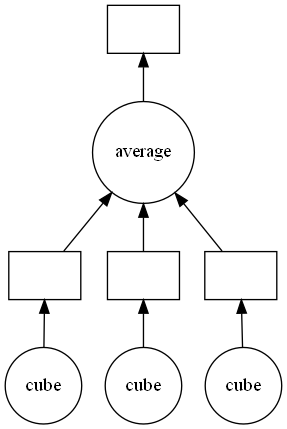

In [2]:
computation_graph.visualize()

#processing data at scale

In [3]:
#feature scaling in dask
#scale the last_evaluation in human resource dataset

import dask.dataframe as dd

ddf = dd.read_csv('datasets/HR_comma_sep.csv')
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(ddf[['last_evaluation']])

#transform data on Scaler
performance_score = scaler.transform(ddf[['last_evaluation']])
performance_score

array([[26.5625],
       [78.125 ],
       [81.25  ],
       ...,
       [26.5625],
       [93.75  ],
       [25.    ]])

In [12]:
#feature encoding in dask

import dask.dataframe as dd
ddf = dd.read_csv('datasets/HR_comma_sep.csv')
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
!pip install dask-ml

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached dask_ml-1.9.0-py3-none-any.whl (143 kB)
  Using cached dask_glm-0.2.0-py2.py3-none-any.whl (12 kB)
  Using cached numba-0.53.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached multipledispatch-0.6.0-py3-none-any.whl (11 kB)
  Using cached distributed-2021.7.1-py3-none-any.whl (766 kB)
  Using cached tblib-1.7.0-py2.py3-none-any.whl (12 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached zict-2.0.0-py3-none-any.whl (10 kB)
  Using cached msgpack-1.0.2-cp39-cp39-win_amd64.whl (68 kB)
  Using cached psutil-5.8.0-cp39-cp39-win_amd64.whl (246 kB)


In [22]:
#import one hot encoding
from dask_ml.preprocessing import OneHotEncoder
from dask_ml.preprocessing import Categorizer
from sklearn.pipeline import make_pipeline

#create pipeline with categorizer and onehotencoder
pipe = make_pipeline(Categorizer(), OneHotEncoder())

#fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary']])
result = pipe.transform(ddf[['salary']])
result.head()

,salary_low,salary_medium,salary_high
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [20]:
#ordinal Encoder on dask
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(Categorizer(), OrdinalEncoder())
pipe.fit(ddf[['salary']])
result = pipe.transform(ddf[['salary']])
result.head()

,salary
0,0
1,1
2,1
3,0
4,0


In [24]:
#parallel computing using scikit learn
import pandas as pd
df = pd.read_csv('datasets/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
# select feature and target columns
data = df[['satisfaction_level', 'last_evaluation']]
label = df['left']

In [35]:
#import dask.distributed client to create a scheduler and worker on local machine
from dask.distributed import Client

client = Client()

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60989 instead
  warnings.warn(


In [36]:
#create parallel backend using scikit learn
import joblib
from joblib import parallel_backend
with parallel_backend('dask'):
    #write normal scikit learn code here:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(data, label, 
                                                        test_size = 0.2,
                                                       random_state = 0)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_pred, y_test))
    

Accuracy: 0.9203333333333333


Reimplementing ML algorithms for dask

In [34]:
# bulid a logisitc regression and perform clustering

import dask.dataframe as dd
ddf = dd.read_csv('datasets/HR_comma_sep.csv')
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [37]:
data = ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)
label = ddf['left'].to_dask_array(lengths=True)

In [38]:
#logistic regression on dask
from dask_ml.linear_model import LogisticRegression
from dask_ml.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Accuracy:", accuracy_score(y_predict, y_test))

Accuracy: 0.766


In [2]:
#clustering
import dask.dataframe as dd
ddf = dd.read_csv('datasets/HR_comma_sep.csv')
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data = ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)

In [4]:
from dask_ml.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(data)
#predict the class
label=model.labels_
label.compute()

array([1, 0, 2, ..., 1, 2, 1])

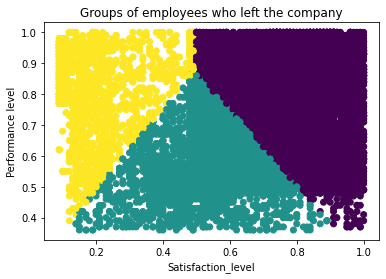

In [5]:
import matplotlib.pyplot as plt

x=data[:,0].compute()
y=data[:,1].compute()
cluster_labels=label.compute()

plt.scatter(x, y, c=cluster_labels)

plt.xlabel('Satisfaction_level')
plt.ylabel('Performance level')
plt.title('Groups of employees who left the company')
plt.show()
